In [6]:
# First cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Second cell
def load_price_data():
    # Load all three price files
    files = [
        '/Users/rajshah/IMCProsperity2025/prices_round_1_day_-2.csv',
        '/Users/rajshah/IMCProsperity2025/prices_round_1_day_-1.csv',
        '/Users/rajshah/IMCProsperity2025/prices_round_1_day_0.csv'
    ]
    
    dfs = []
    for file in files:
        df = pd.read_csv(file, sep=';')
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=True)

# Load the data
df = load_price_data()
print(f"Total number of records: {len(df)}")
print("\nFirst few records:")
df.head()

# Third cell
def analyze_product(df, product):
    # Filter data for specific product
    product_df = df[df['product'] == product]
    
    # Calculate basic statistics
    stats = {
        'mean_price': product_df['mid_price'].mean(),
        'std_price': product_df['mid_price'].std(),
        'min_price': product_df['mid_price'].min(),
        'max_price': product_df['mid_price'].max(),
        'price_range': product_df['mid_price'].max() - product_df['mid_price'].min(),
        'mean_spread': (product_df['ask_price_1'] - product_df['bid_price_1']).mean(),
        'mean_volume': product_df['bid_volume_1'].mean() + product_df['ask_volume_1'].mean()
    }
    
    # Calculate price changes
    product_df['price_change'] = product_df['mid_price'].diff()
    stats['mean_daily_change'] = product_df['price_change'].mean()
    stats['std_daily_change'] = product_df['price_change'].std()
    
    return stats

# Analyze each product
products = df['product'].unique()
product_stats = {}

for product in products:
    product_stats[product] = analyze_product(df, product)

# Display statistics in a DataFrame for better readability
stats_df = pd.DataFrame(product_stats).T
stats_df

def analyze_correlations(df):
    # Create a pivot table to align prices by timestamp
    pivot_df = df.pivot_table(
        index=['day', 'timestamp'],
        columns='product',
        values='mid_price'
    ).reset_index()
    
    # Calculate correlations between products
    products = df['product'].unique()
    correlations = {}
    
    for i, prod1 in enumerate(products):
        for prod2 in products[i+1:]:
            # Drop rows with NaN values for either product
            valid_data = pivot_df[[prod1, prod2]].dropna()
            if len(valid_data) > 0:  # Only calculate correlation if we have valid data
                corr = valid_data[prod1].corr(valid_data[prod2])
                correlations[f"{prod1}-{prod2}"] = corr
            else:
                correlations[f"{prod1}-{prod2}"] = np.nan
    
    return correlations



Total number of records: 90000

First few records:


/var/folders/0x/myn1g6jn4gj9ydh__4zqwznw0000gn/T/ipykernel_74636/4124278096.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['price_change'] = product_df['mid_price'].diff()
/var/folders/0x/myn1g6jn4gj9ydh__4zqwznw0000gn/T/ipykernel_74636/4124278096.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['price_change'] = product_df['mid_price'].diff()
/var/folders/0x/myn1g6jn4gj9ydh__4zqwznw0000gn/T/ipykernel_74636/4124278096.py:50: SettingWithCopyWarning: 
A value is trying to be se

Product Correlations:
RAINFOREST_RESIN-KELP: 0.0021
RAINFOREST_RESIN-SQUID_INK: 0.0038
KELP-SQUID_INK: -0.5915


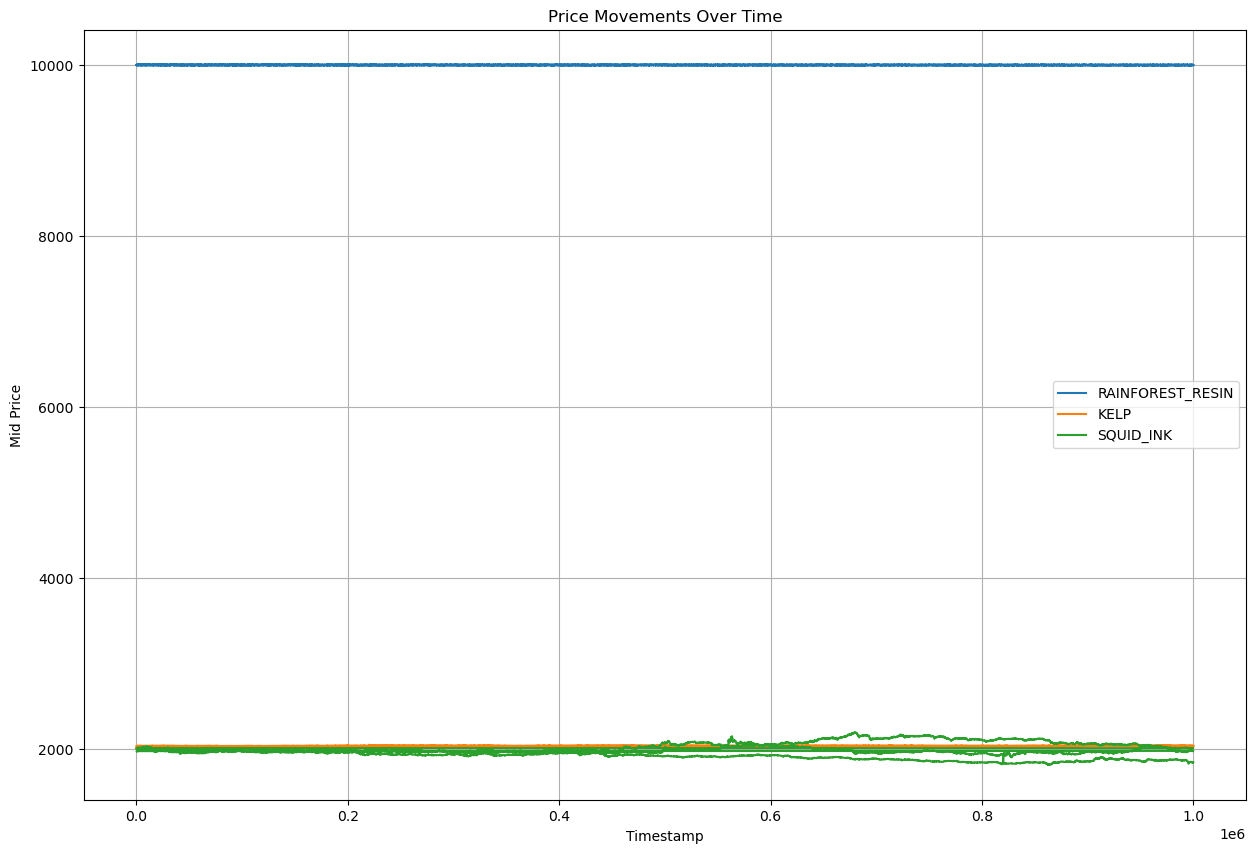

In [7]:
correlations = analyze_correlations(df)
print("Product Correlations:")
for pair, corr in correlations.items():
    print(f"{pair}: {corr:.4f}")

# Fifth cell
plt.figure(figsize=(15, 10))
for product in products:
    product_df = df[df['product'] == product]
    plt.plot(product_df['timestamp'], product_df['mid_price'], label=product)

plt.title('Price Movements Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
j